https://www.airnowapi.org/aq/forecast/zipCode/?format=text/csv&zipCode=74630&date=2022-05-01&distance=100&API_KEY=EAE6339B-0973-4F2E-923F-C117D76AB882


/Users/jasonzhang/Documents/PersonalProjects/AirflowIQ/.venv/lib/python3.9/site-packages/act/plotting/plot.py:81: UserWarning: Could not discern datastreamname and dict or tuple were not provided. Using defaultname of act_datastream!
  warnings.warn(


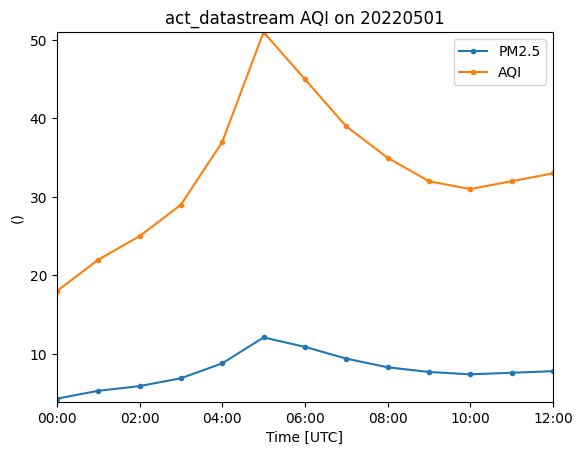

In [57]:
import os
import matplotlib.pyplot as plt
import act
from dotenv import dotenv_values
import pandas as pd

# You need an account and token from https://docs.airnowapi.org/ first
# token = os.getenv('AIRNOW_API')
env_vars = dotenv_values()
token = env_vars["AIRNOW_API_KEY"]
# print(token)

if token is not None and len(token) > 0:
    # This first example will get the forcasted values for the date passed
    # at stations within 100 miles of the Zipcode. Can also use latlon instead as
    # results = act.discovery.get_airnow_forecast(token, '2022-05-01', distance=100,
    #                                             latlon=[41.958, -88.12])
    # If the username and token are not set, use the existing sample file
    results = act.discovery.get_airnow_forecast(token, '2022-05-01', zipcode=74630, distance=100)

    # The results show a dataset with air quality information from Oklahoma City
    # The data is not indexed by time and just a rudimentary xarray object from
    # converted from a pandas DataFrame.  Note that the AirNow API labels the data
    # returned as AQI.
    # print(results)

    # This call gives the daily average for Ozone, PM2.5 and PM10
    results = act.discovery.get_airnow_obs(token, date='2022-05-01', zipcode=74630, distance=100)
    # print(results)

    # This call will get all the station data for a time period within
    # the bounding box provided.  This will return the object with time
    # as a coordinate and can be used with ACT Plotting to plot after
    # squeezing the dimensions.  It can be a 2D time series
    lat_lon = '-98.172,35.879,-96.76,37.069'
    results = act.discovery.get_airnow_bounded_obs(
        token, '2022-05-01T00', '2022-05-01T12', lat_lon, 'OZONE,PM25', data_type='B'
    )
    # Reduce to 1D timeseries
    results = results.squeeze(dim='sites', drop=False)
    # print(results)

    # Plot out data but note that Ozone was not return in the results
    display = act.plotting.TimeSeriesDisplay(results)
    display.plot('PM2.5', label='PM2.5')
    display.plot('AQI', label='AQI')
    plt.legend()
    plt.show()

In [59]:
df = act.discovery.get_airnow_forecast(token, '2024-4-29', zipcode="10001", distance=100).to_dataframe()
df

https://www.airnowapi.org/aq/forecast/zipCode/?format=text/csv&zipCode=10001&date=2024-4-29&distance=100&API_KEY=EAE6339B-0973-4F2E-923F-C117D76AB882


,DateIssue,DateForecast,ReportingArea,StateCode,Latitude,Longitude,ParameterName,AQI,CategoryNumber,CategoryName,ActionDay,Discussion
index,,,,,,,,,,,,
0,2024-04-26,2024-04-29,New York City Region,NY,40.8419,-73.8359,O3,54,2,Moderate,False,NaN
1,2024-04-26,2024-04-29,New York City Region,NY,40.8419,-73.8359,PM2.5,50,1,Good,False,NaN


In [60]:
# keys are upper bounds (inclusive) for each aqi category, and values are associated information
aqi_def_map = {50: "Good;Little to no risk",
               100: "Moderate;Acceptable, risk for those who are very sensitive to air pollution",
               150: "Unhealthy for Sensitive Groups;Risky for members of sensitive groups, general public likely not affected",
               200: "Unhealthy;Some members of general public may be affected, serious for sensitive groups",
               300: "Very Unhealthy;Increased risk for everyone",
               500: "Hazardous;Emergency conditions for everyone"}

def get_aqi_category(df):
    df_copy = df.copy(deep=True)
    category = []
    desc = []
    for j, row in df.iterrows():
        measure = row["AQI"]
        for i, pair in enumerate(aqi_def_map.items()):
            key, val = pair
            if measure <= key:
                info = val.split(";")
                category.append(info[0])
                desc.append(info[1])
                break
    df_copy["Category"] = category
    df_copy["Description"] = desc
    return df_copy


df_agg = df[["ParameterName", "AQI"]].groupby("ParameterName").mean()

get_aqi_category(df_agg)

,AQI,Category,Description
ParameterName,,,
O3,54.0,Moderate,"Acceptable, risk for those who are very sensit..."
PM2.5,50.0,Good,Little to no risk


In [19]:
import requests
from pprint import pprint

url = f"https://api.tomorrow.io/v4/weather/realtime?location=boston&units=imperial&apikey={env_vars['TOMORROW_API_KEY']}"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

pprint(response.json())

{'data': {'time': '2024-04-28T17:24:00Z',
          'values': {'cloudBase': 0.47,
                     'cloudCeiling': 0.47,
                     'cloudCover': 95,
                     'dewPoint': 47.98,
                     'freezingRainIntensity': 0,
                     'humidity': 67,
                     'precipitationProbability': 0,
                     'pressureSurfaceLevel': 30.06,
                     'rainIntensity': 0,
                     'sleetIntensity': 0,
                     'snowIntensity': 0,
                     'temperature': 58.78,
                     'temperatureApparent': 58.78,
                     'uvHealthConcern': 2,
                     'uvIndex': 5,
                     'visibility': 9.94,
                     'weatherCode': 1001,
                     'windDirection': 215.69,
                     'windGust': 13.42,
                     'windSpeed': 9.65}},
 'location': {'lat': 42.35543441772461,
              'lon': -71.06050872802734,
              'nam